In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import fitsio as ft
import numpy  as np
import pandas as pd
import healpy as hp
import logging

import sys
sys.path.append('/home/mehdi/github/LSSutils')
from LSSutils import setup_logging
from LSSutils.catalogs.combinefits import DR8templates
from LSSutils.catalogs.datarelease import cols_dr8_rand
from LSSutils.utils import hpixsum

camb is not installed!


In [2]:
setup_logging('info')

# prepare the templates

In [3]:
dr8 = DR8templates(inputFile='/home/mehdi/data/pixweight-dr8-0.31.1.fits')

[ 000000.58 ]   0: 02-25 15:14  DR8templates    INFO     read /home/mehdi/data/pixweight-dr8-0.31.1.fits


In [4]:
dr8.run(cols_dr8_rand)

[ 000001.21 ]   0: 02-25 15:14  DR8templates    INFO     read STARDENS
[ 000001.24 ]   0: 02-25 15:14  DR8templates    INFO     read EBV
[ 000001.27 ]   0: 02-25 15:14  DR8templates    INFO     read PSFDEPTH_G
[ 000001.27 ]   0: 02-25 15:14  DR8templates    INFO     change PSFDEPTH_G units
/home/mehdi/github/LSSutils/LSSutils/catalogs/combinefits.py:137: RuntimeWarning: invalid value encountered in sqrt
  FluxToMag = lambda flux: -2.5 * (np.log10(5/np.sqrt(flux)) - 9.)
/home/mehdi/github/LSSutils/LSSutils/catalogs/combinefits.py:137: RuntimeWarning: divide by zero encountered in true_divide
  FluxToMag = lambda flux: -2.5 * (np.log10(5/np.sqrt(flux)) - 9.)
[ 000001.34 ]   0: 02-25 15:14  DR8templates    INFO     read PSFDEPTH_R
[ 000001.34 ]   0: 02-25 15:14  DR8templates    INFO     change PSFDEPTH_R units
[ 000001.40 ]   0: 02-25 15:14  DR8templates    INFO     read PSFDEPTH_Z
[ 000001.41 ]   0: 02-25 15:14  DR8templates    INFO     change PSFDEPTH_Z units
[ 000001.45 ]   0: 02-25 15

/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:1196: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:1155: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:1176: RuntimeWarning: invalid value encountered in less
  result.data[result.data < 0] = 0.0
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:11

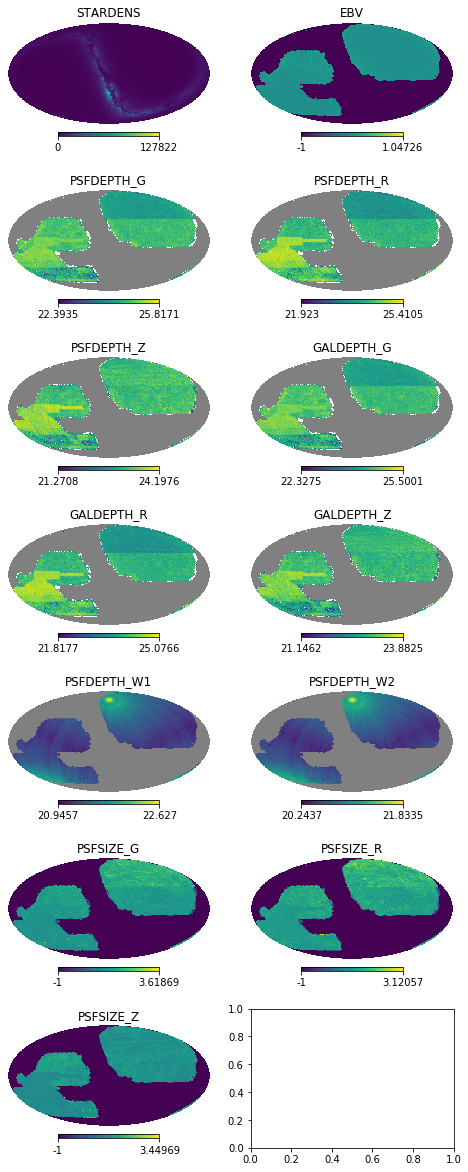

In [5]:
dr8.plot()

In [7]:
dr8dataframe = dr8.to_pandas()

In [9]:
dr8dataframe.to_hdf('/home/mehdi/data/templates/pixweight-dr8-0.31.1.h5', key='templates')

[ 000111.73 ]   0: 02-25 15:16  numexpr.utils   INFO     Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
[ 000111.73 ]   0: 02-25 15:16  numexpr.utils   INFO     NumExpr defaulting to 8 threads.


# project mocks to healpix

In [ ]:
# --- run only once -- Feb 25, 2020

# def read_randoms(list_randoms):
#     randoms = []
#     for random in list_randoms:
#         randoms.append(ft.read(random))
#     return np.concatenate(randoms)

# random size, columns
# 102000000,`
#  dtype([('RA', '>f8'), ('DEC', '>f8'), ('Z_COSMO', '>f4'), ('DZ_RSD', '>f4')]))
# random = read_randoms(['/B/Shared/Shadab/FA_LSS/FA_EZmock_desi_ELG_v0_rand_00.fits',
#                       '/B/Shared/Shadab/FA_LSS/FA_EZmock_desi_ELG_v0_rand_01.fits',
#                       '/B/Shared/Shadab/FA_LSS/FA_EZmock_desi_ELG_v0_rand_02.fits'])
# ft.write('/home/mehdi/data/mocksys/FA_EZmock_desi_ELG_v0_rand_00to2.fits', 
#          np.column_stack([random['RA'], random['DEC']]))

# random = ft.read('/home/mehdi/data/mocksys/FA_EZmock_desi_ELG_v0_rand_00to2.fits')
# nside = 256
# hprandom = hpixsum(nside, random[:,0], random[:, 1])
# hp.write_map(f'/home/mehdi/data/mocksys/FA_EZmock_desi_ELG_v0_rand_00to2.hp{nside}.fits',
#             hprandom, fits_IDL=False, dtype='float64')